#📌 Extracción

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url= '/content/drive/MyDrive/TelecomX_Data.json'

pd.read_json(url).head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df = pd.read_json(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\nPrimeras filas:")
print(df.head())

Filas: 7267, Columnas: 6

Primeras filas:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService

In [ ]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


#🔧 Transformación

In [ ]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

Unificando los datos en un solo Dataframe

In [ ]:
datos = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.reset_index(inplace = True, drop = True)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

In [ ]:
datos.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


Para el analisis datallamos la siguiente definición

---



---



**Churn = "Yes"**: El cliente ha cancelado su suscripción o ha dejado de utilizar los servicios de TelecomX.

**Churn = "No"**: El cliente sigue siendo activo y continúa utilizando los servicios.

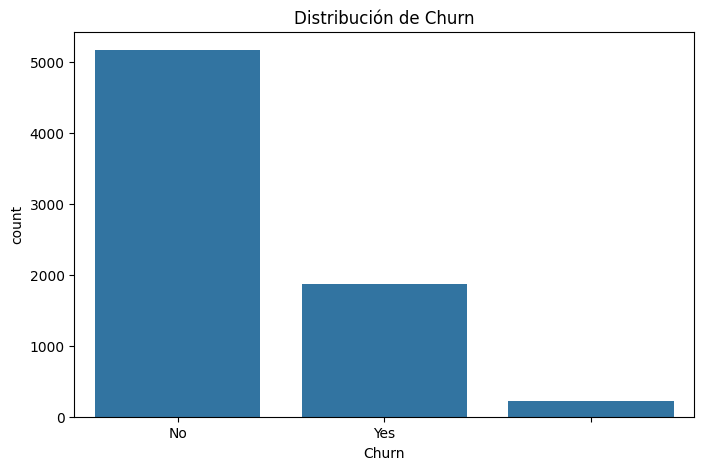

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(x='Churn', data=datos)
plt.title('Distribución de Churn')
plt.show()

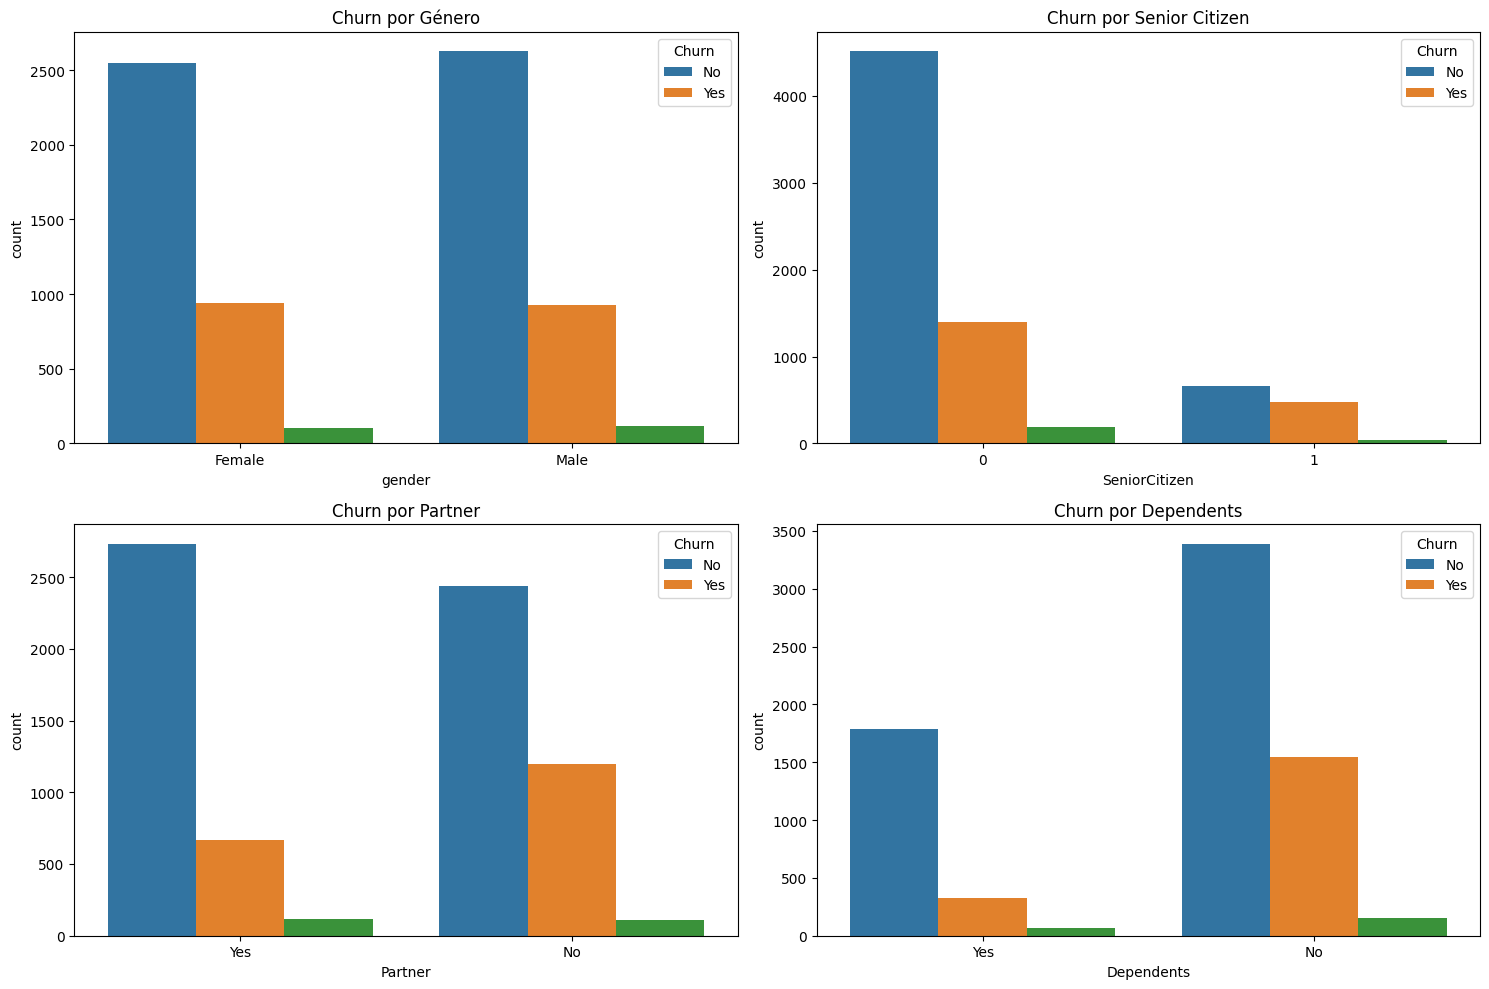

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Género
sns.countplot(x='gender', hue='Churn', data=datos, ax=axes[0,0])
axes[0,0].set_title('Churn por Género')

# Senior Citizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=datos, ax=axes[0,1])
axes[0,1].set_title('Churn por Senior Citizen')

# Partner
sns.countplot(x='Partner', hue='Churn', data=datos, ax=axes[1,0])
axes[1,0].set_title('Churn por Partner')

# Dependents
sns.countplot(x='Dependents', hue='Churn', data=datos, ax=axes[1,1])
axes[1,1].set_title('Churn por Dependents')

plt.tight_layout()
plt.show()

Churn por Servicios Contratado

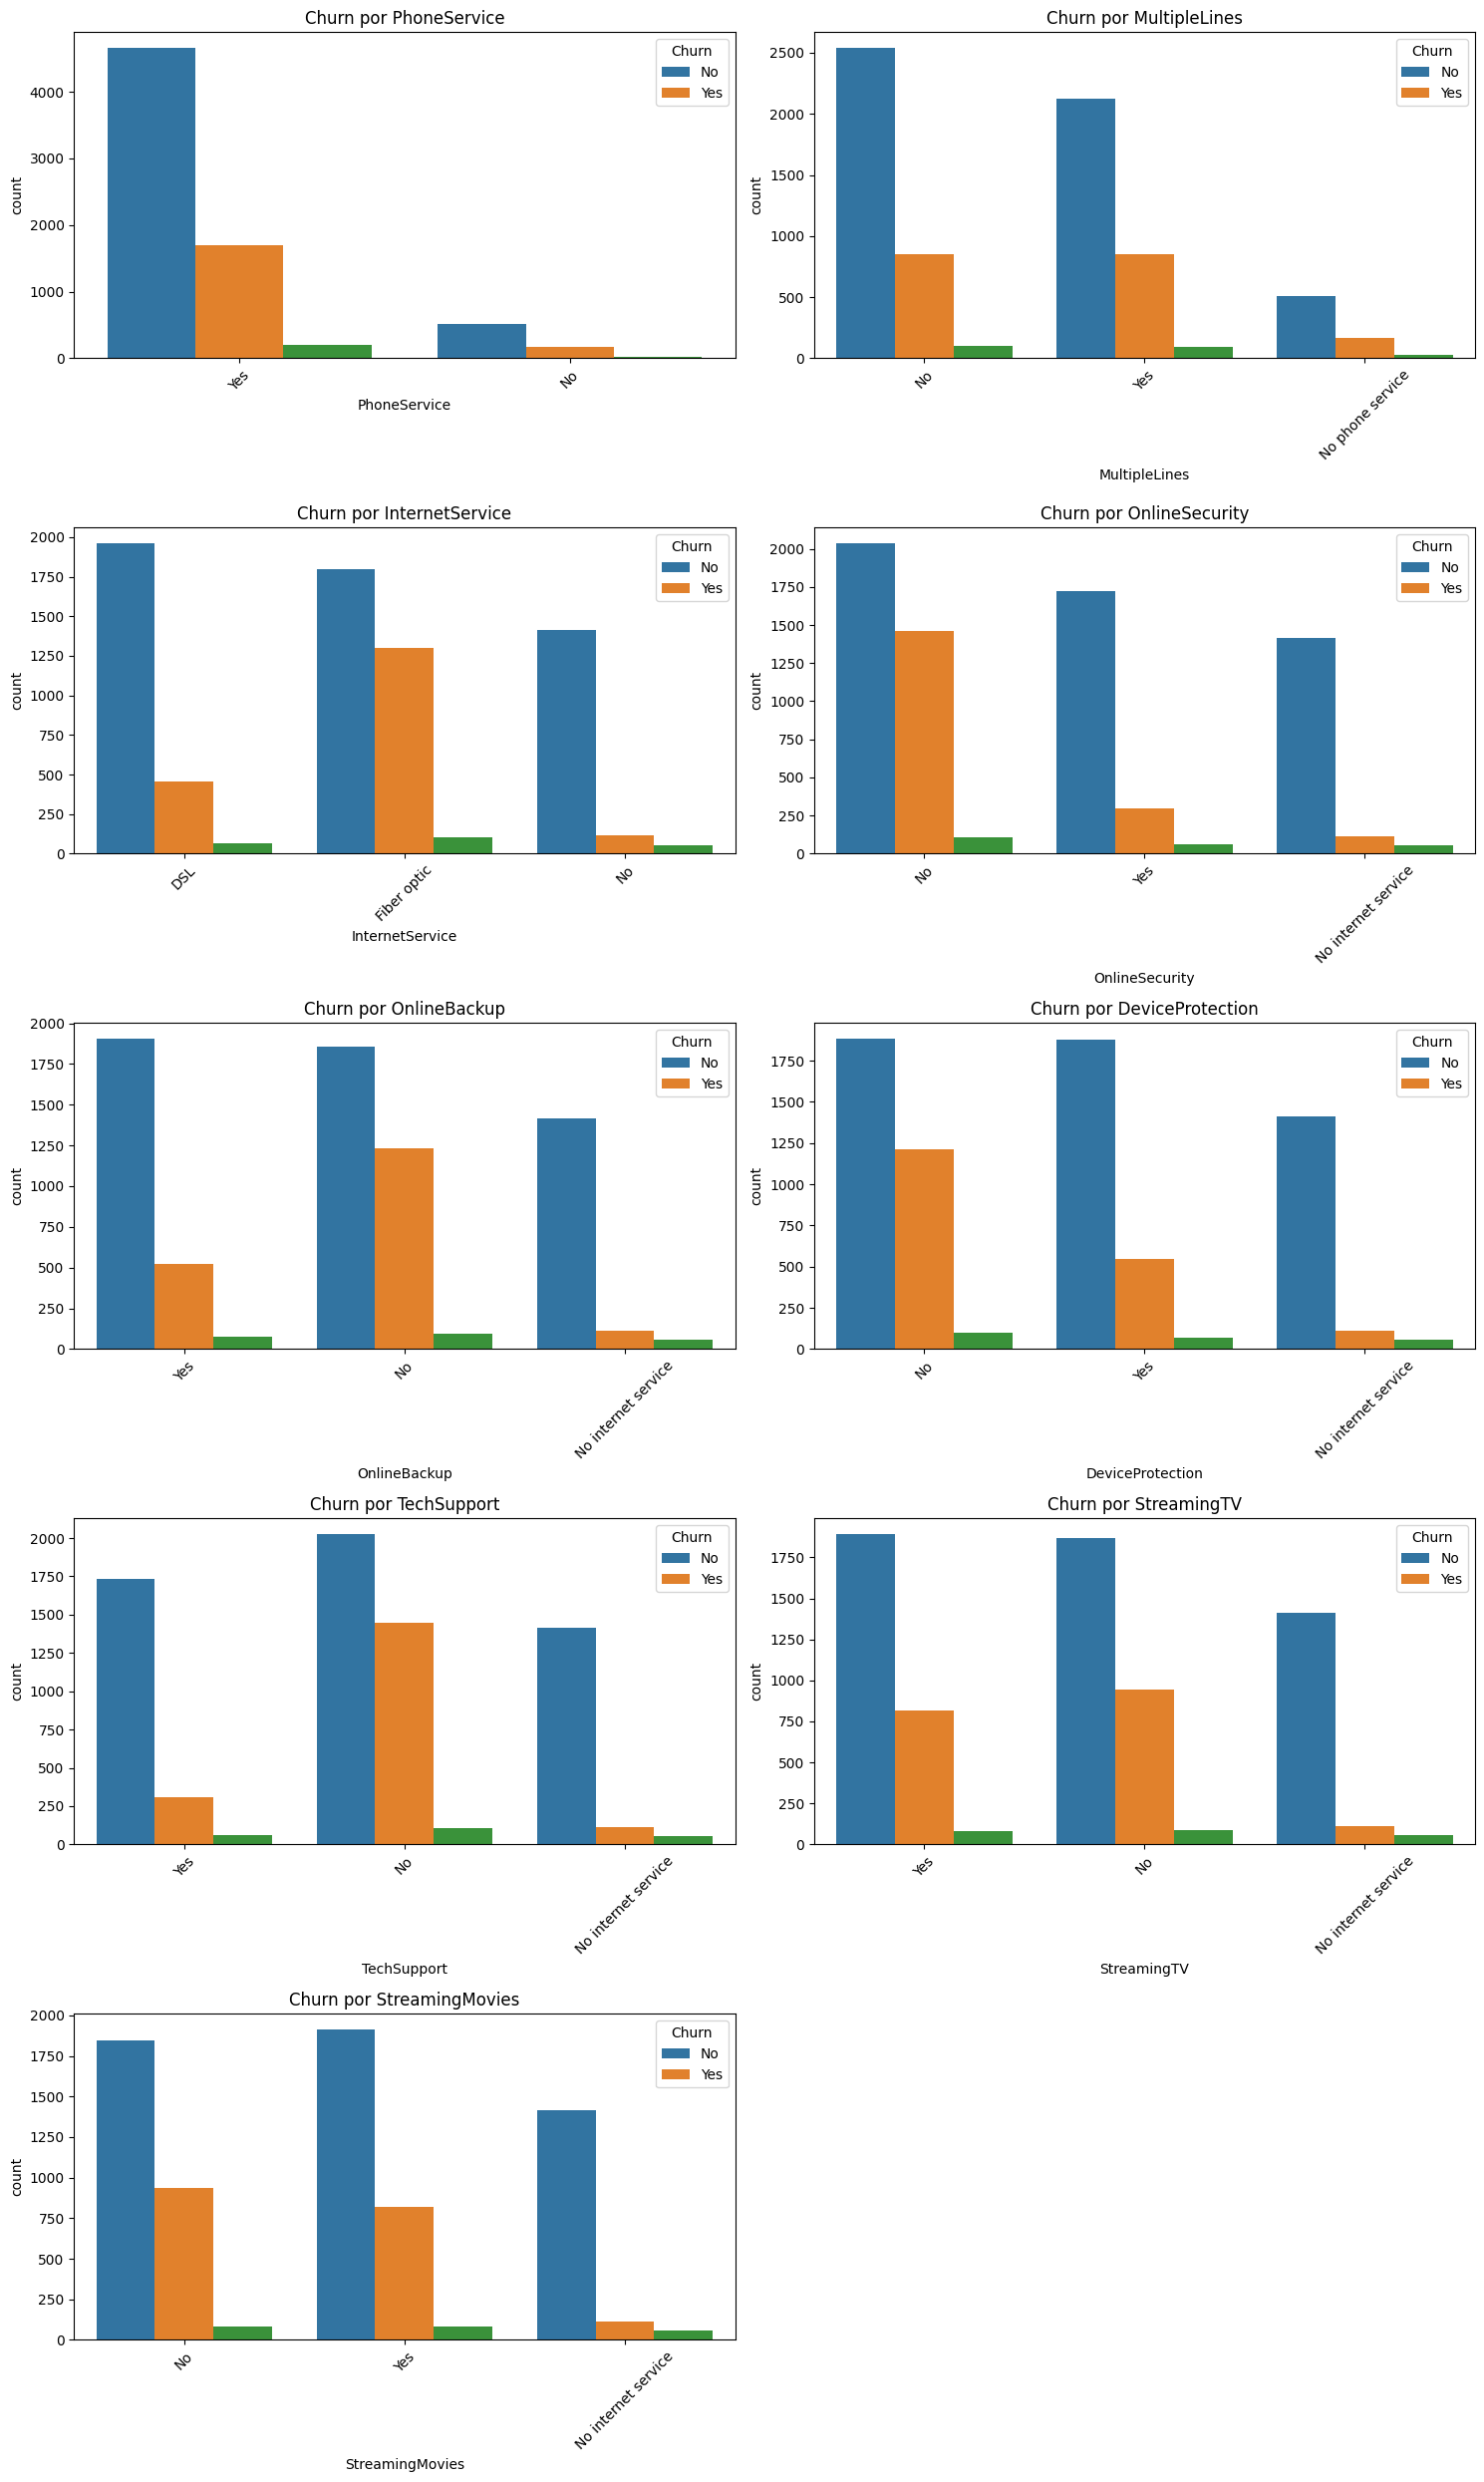

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15,25))
for i, service in enumerate(services, 1):
    plt.subplot(5,2,i)
    sns.countplot(x=service, hue='Churn', data=datos)
    plt.title(f'Churn por {service}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Churn v/s Servicios Contratados:

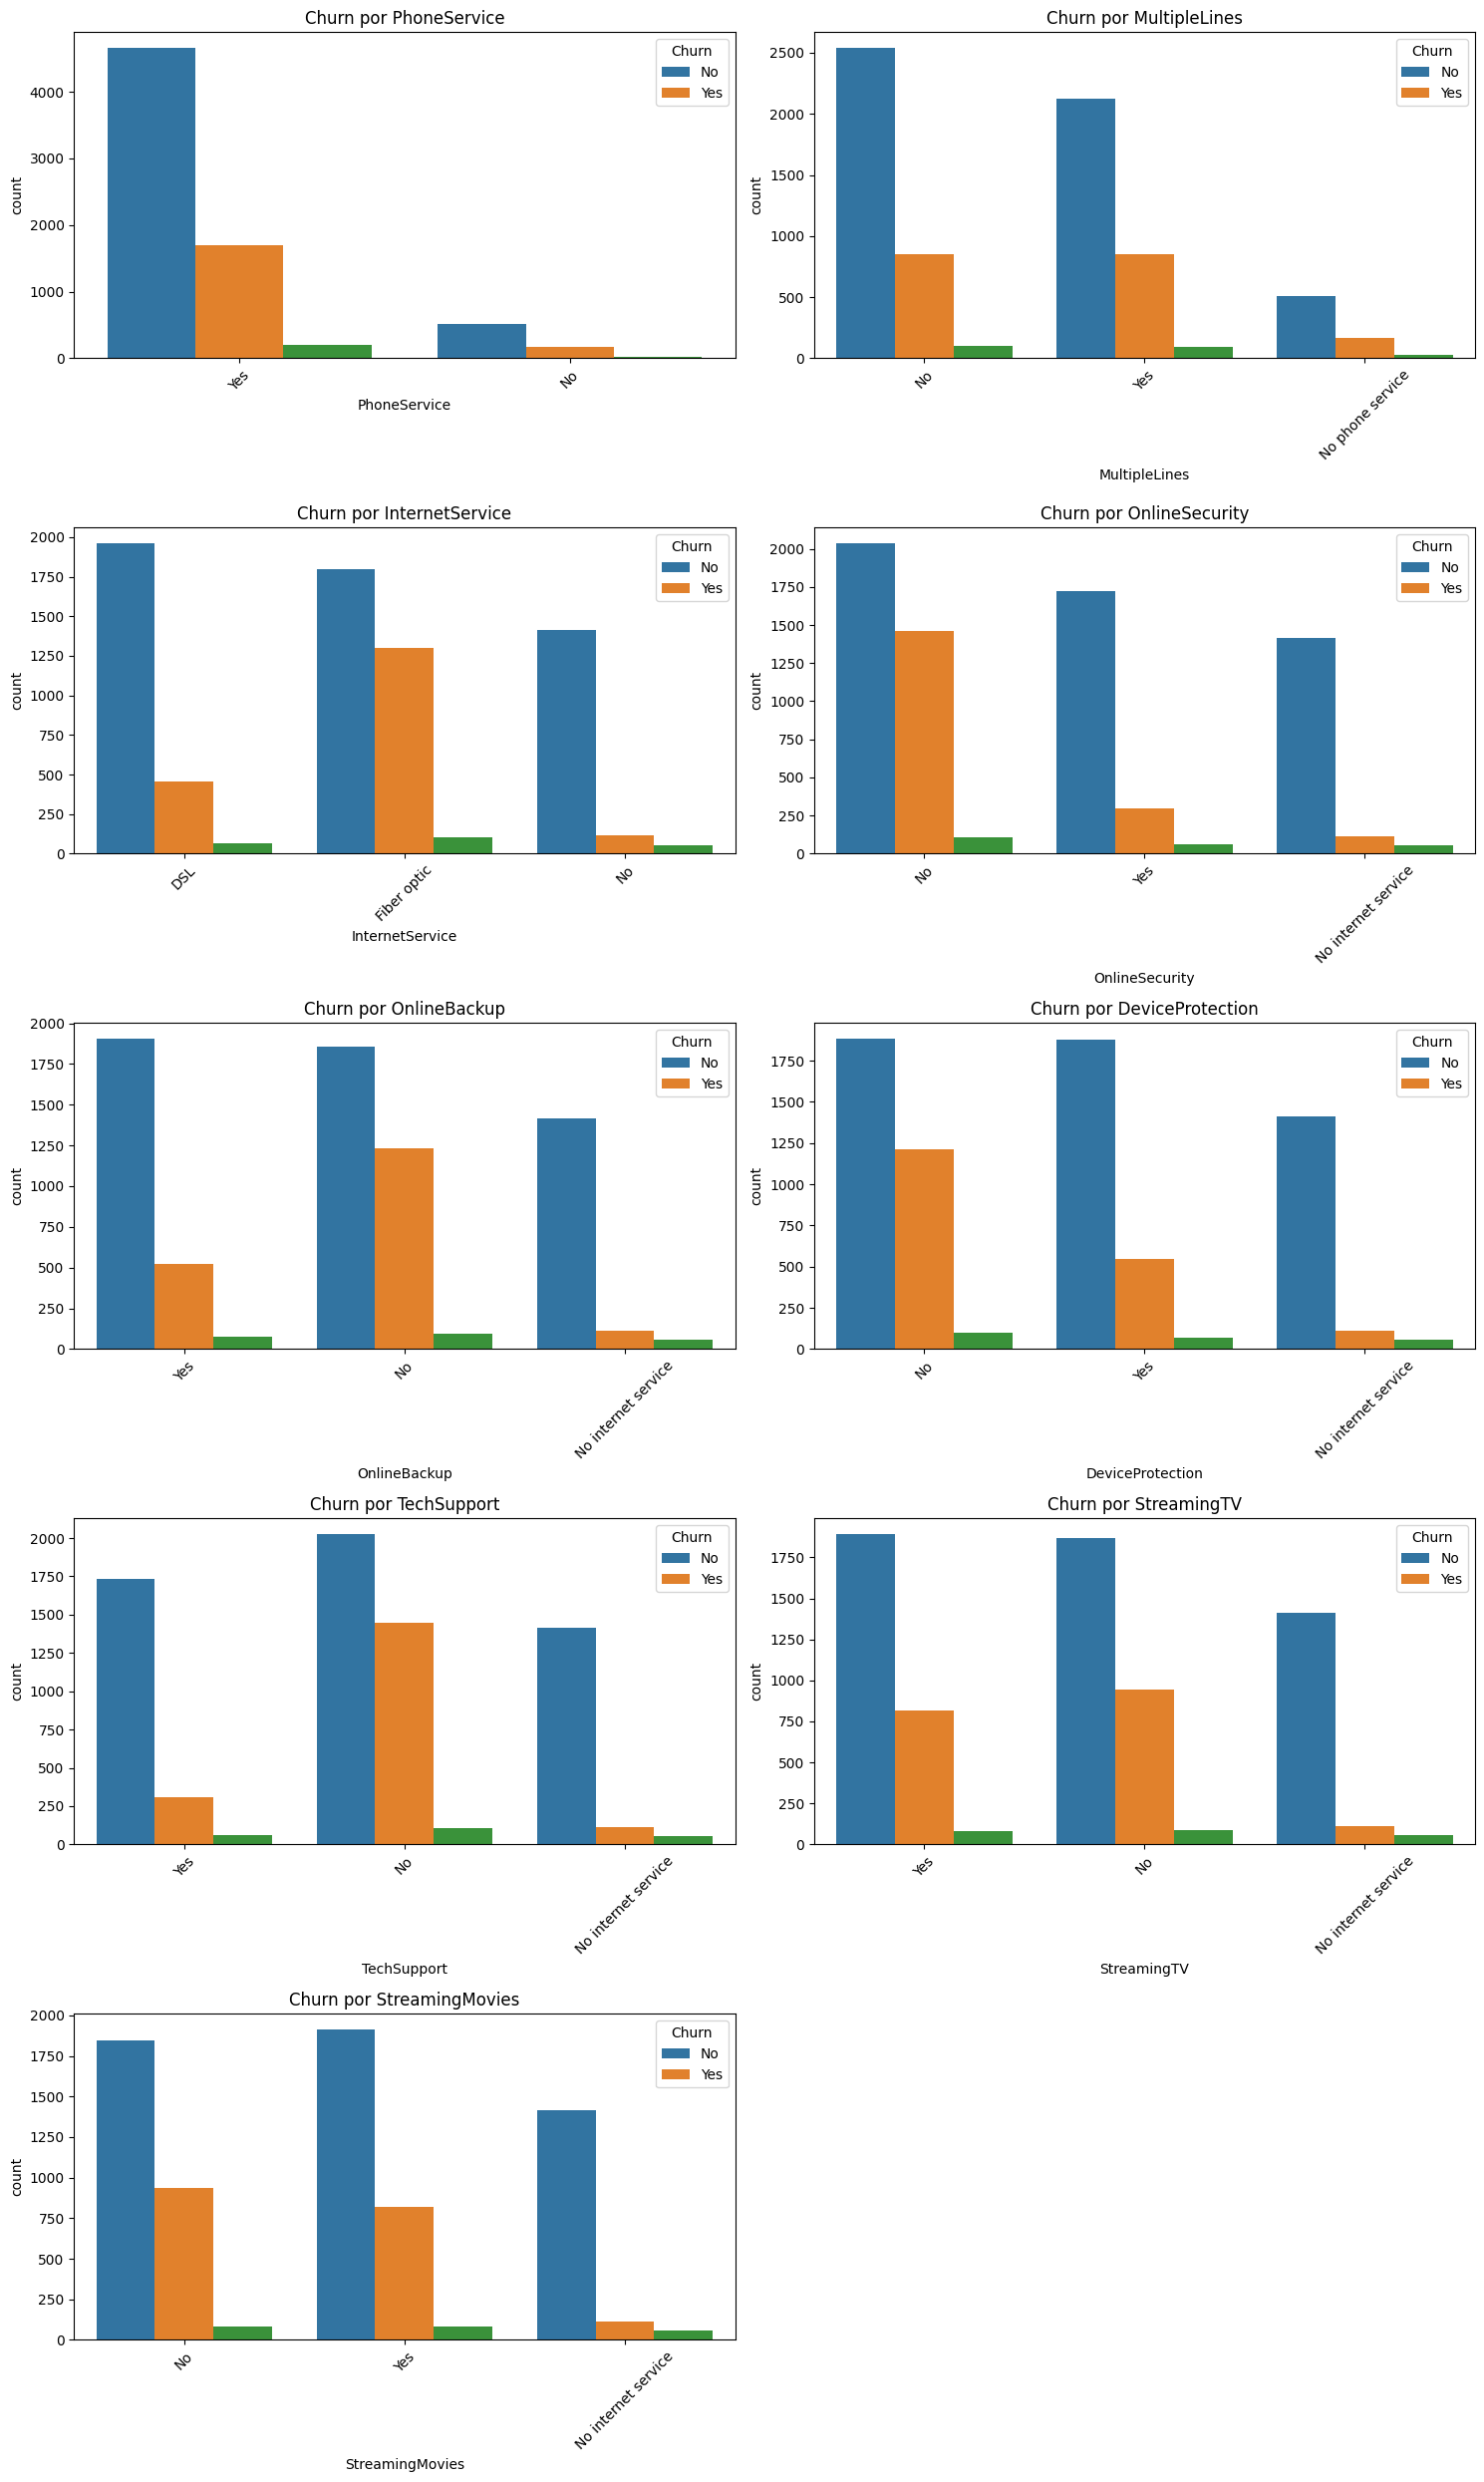

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15,25))
for i, service in enumerate(services, 1):
    plt.subplot(5,2,i)
    sns.countplot(x=service, hue='Churn', data=datos)
    plt.title(f'Churn por {service}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Relación entre Churn y Facturación

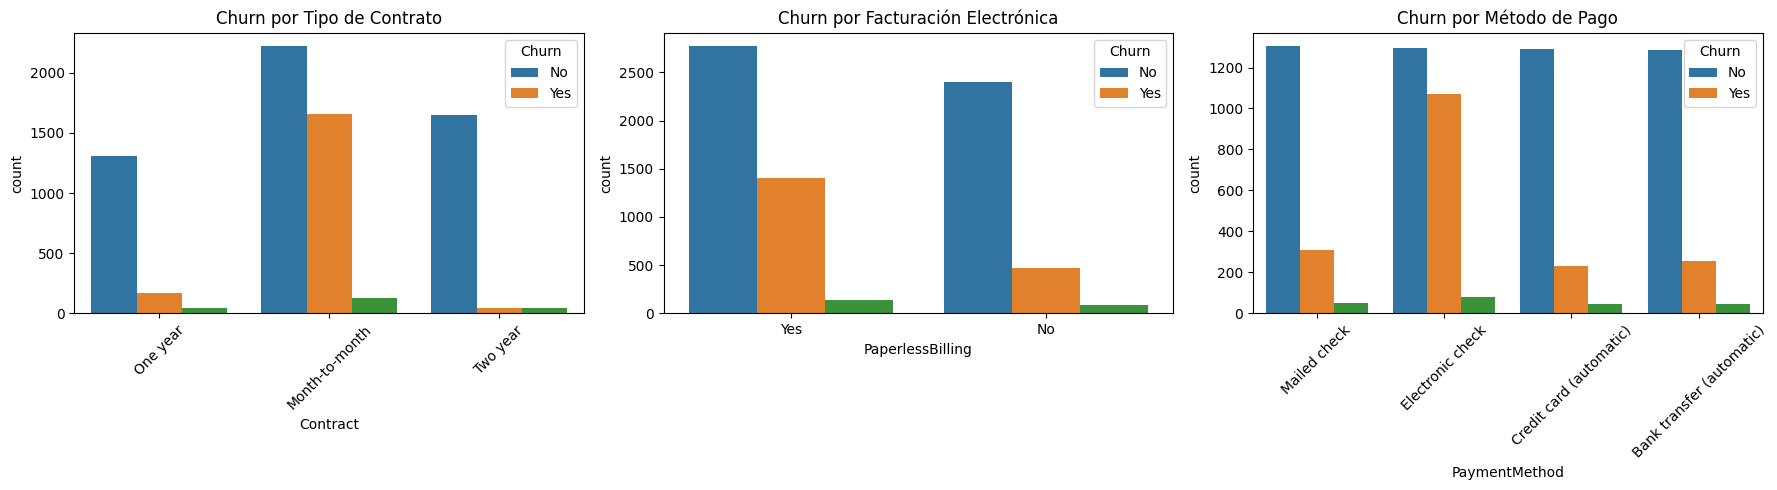

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Tipo de contrato

sns.countplot(x='Contract', hue='Churn', data=datos, ax=axes[0])
axes[0].set_title('Churn por Tipo de Contrato')
axes[0].tick_params(axis='x', rotation=45)

# Facturación electrónica

sns.countplot(x='PaperlessBilling', hue='Churn', data=datos, ax=axes[1])
axes[1].set_title('Churn por Facturación Electrónica')

# Método de pago

sns.countplot(x='PaymentMethod', hue='Churn', data=datos, ax=axes[2])
axes[2].set_title('Churn por Método de Pago')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Churn vs Tenure y Cargos Mensuales


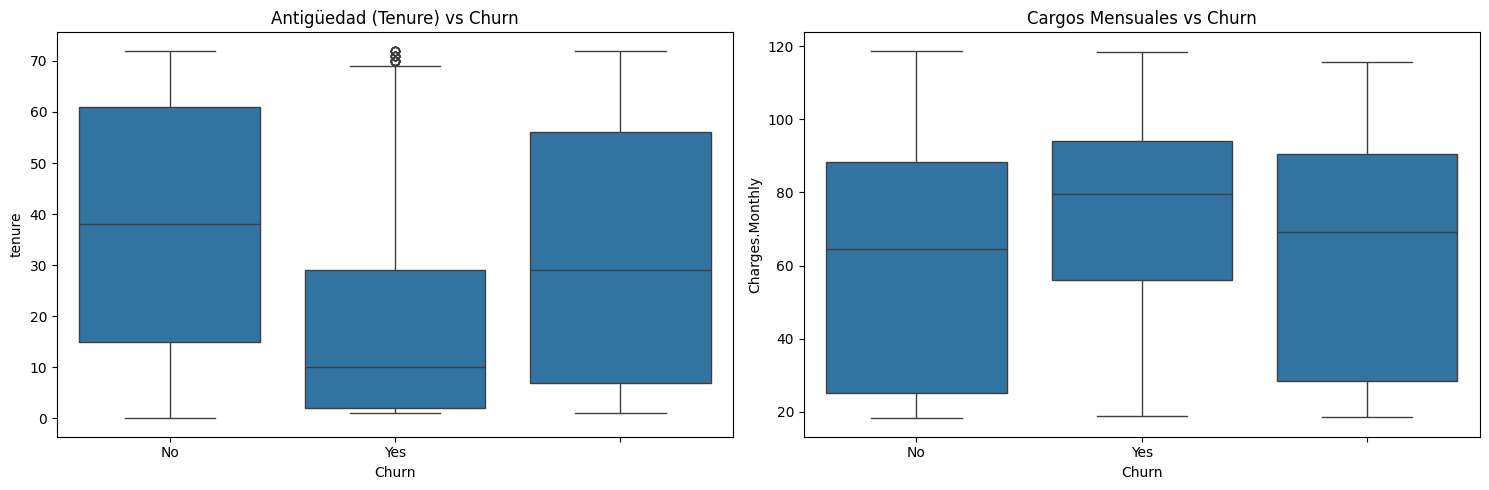

In [ ]:
plt.figure(figsize=(15,5))

# Tenure vs Churn
plt.subplot(1,2,1)
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Antigüedad (Tenure) vs Churn')

# Cargos mensuales vs Churn
plt.subplot(1,2,2)
sns.boxplot(x='Churn', y='Charges.Monthly', data=datos)
plt.title('Cargos Mensuales vs Churn')

plt.tight_layout()
plt.show()

#📄Informe final

Principales Hallazgos:
Factores Demográficos:

Los clientes "Senior Citizen" tienen una tasa de churn significativamente mayor.

Los clientes sin pareja (Partner) o dependientes (Dependents) tienen mayor probabilidad de churn.

Servicios Contratados:

Los clientes con servicio de Fibra Óptica tienen mayor tasa de churn que los de DSL.

La falta de servicios adicionales como Online Security, Tech Support o Backup está asociada con mayor churn.

Los clientes con múltiples líneas telefónicas tienen menor tasa de churn.

Facturación y Contrato:

Los contratos mes a mes tienen la mayor tasa de churn.

La facturación electrónica (Paperless Billing) está asociada con mayor churn.

Los métodos de pago electrónicos tienen mayor churn que los automáticos o por cheque.

Tenure y Cargos:

Los clientes con menor antigüedad (tenure) tienen mayor probabilidad de churn.

Los clientes que se van tienden a tener cargos mensuales más altos.

